import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,train_size=0.8,test_size=0.2,random_state=0)
train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train =  scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
import time

In [6]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')

In [7]:
clf.C =1
st = time.time()
clf.fit(X_train,y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

4.611015319824219 [ms]


0.96491228070175439

In [8]:
clf.C = 1e20

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

282.9878330230713 [ms]


0.95614035087719296

In [9]:
from sklearn.model_selection import GridSearchCV

param= {'C':10**np.arange(-15.0,21.0)}

gs = GridSearchCV(clf,param,verbose=1)
gs.fit(X_train,y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1e+20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.0000...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

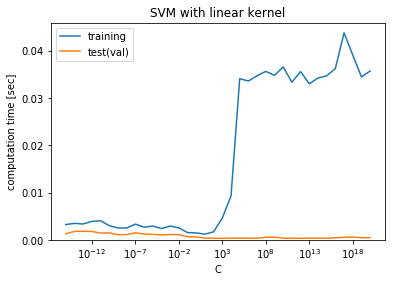

In [10]:
plt.plot(gs.cv_results_['param_C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_C'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best");
plt.title("SVM with linear kernel");

In [11]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

In [12]:
clf.C =1
st =time.time()
clf.fit(X_train,y_train)
print(1000*(time.time()-st),"[ms]")
clf.score(X_test,y_test)

3.6678314208984375 [ms]


0.96491228070175439

In [13]:
clf.C = 1e20

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

7.871150970458984 [ms]


0.94736842105263153

In [14]:
from sklearn.model_selection import GridSearchCV

param = {'C': 10**np.arange(-15.0,21.0)}

gs2 = GridSearchCV(clf, param, verbose=1)
gs2.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1e+20, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.0000...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

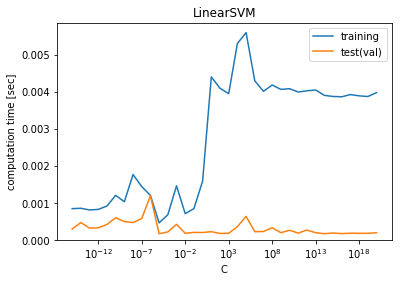

In [15]:
plt.plot(gs2.cv_results_['param_C'].data, 
         gs2.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs2.cv_results_['param_C'].data,
         gs2.cv_results_['mean_score_time'], 
         label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best")
plt.title("LinearSVM");

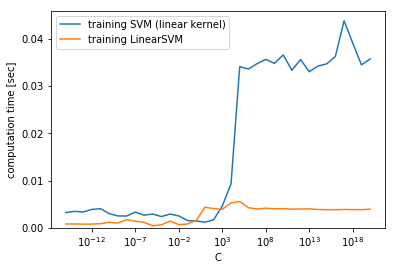

In [16]:
plt.plot(gs.cv_results_['param_C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training SVM (linear kernel)")

plt.plot(gs2.cv_results_['param_C'].data, 
         gs2.cv_results_['mean_fit_time'], 
         label="training LinearSVM")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best");
